In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
df = pd.read_csv("simu3_data/simu3_Hockley.csv",header=[0,1])
df

,I-hit,Unnamed: 1_level_0,A-hit,Unnamed: 3_level_0,A-CR,Unnamed: 5_level_0,Item,Unnamed: 7_level_0,Pair,Unnamed: 9_level_0
,X,Y,X,Y,X,Y,X,Y,X,Y
0,2.070223,0.865969,2.038304,0.842957,2.022344,0.593305,2.034356,2.306792,2.017178,1.361827
1,4.017328,0.810879,4.033288,0.787169,4.017328,0.628870,4.026994,2.046838,4.026994,1.291569
2,6.028272,0.752301,5.996352,0.719526,6.028272,0.714644,6.036810,1.850117,6.036810,1.372365
3,8.007296,0.746722,8.039216,0.735565,8.039216,0.740446,8.046626,1.839578,8.046626,1.583138
4,16.019152,0.708368,16.035112,0.646304,16.051072,0.797629,16.068712,1.677986,16.034356,1.393443


In [3]:
df.columns = ['I_Hit_X','I_Hit_Y','A_Hit_X','A_Hit_Y','A_CR_X','A_CR_Y','Item_X','Item_Y','Pair_X','Pair_Y']
x_range = [2,4,6,8,16]
df['I_Hit_X'] = x_range
df['A_Hit_X'] = x_range
df['A_CR_X'] = x_range
df['Item_X'] = x_range
df['Pair_X'] = x_range
df

,I_Hit_X,I_Hit_Y,A_Hit_X,A_Hit_Y,A_CR_X,A_CR_Y,Item_X,Item_Y,Pair_X,Pair_Y
0,2,0.865969,2,0.842957,2,0.593305,2,2.306792,2,1.361827
1,4,0.810879,4,0.787169,4,0.628870,4,2.046838,4,1.291569
2,6,0.752301,6,0.719526,6,0.714644,6,1.850117,6,1.372365
3,8,0.746722,8,0.735565,8,0.740446,8,1.839578,8,1.583138
4,16,0.708368,16,0.646304,16,0.797629,16,1.677986,16,1.393443


In [4]:
# infer the FAR for items
# Formula: df['Item_Y'] = sp.stats.norm.ppf(df['I_Hit_Y']) - sp.stats.norm.ppf(I_Fars)
import scipy as sp
I_Fars = sp.stats.norm.cdf(sp.stats.norm.ppf(df['I_Hit_Y']) - df['Item_Y'])
np.mean(I_Fars)

0.12154167369959885

In [5]:
sp.stats.norm.ppf(df['A_Hit_Y']) - sp.stats.norm.ppf(1 - df['A_CR_Y'])

array([1.2427405 , 1.12549874, 1.14843764, 1.27445341, 1.20854333])

In [6]:
1 - df['A_CR_Y']

0    0.406695
1    0.371130
2    0.285356
3    0.259554
4    0.202371
Name: A_CR_Y, dtype: float64

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

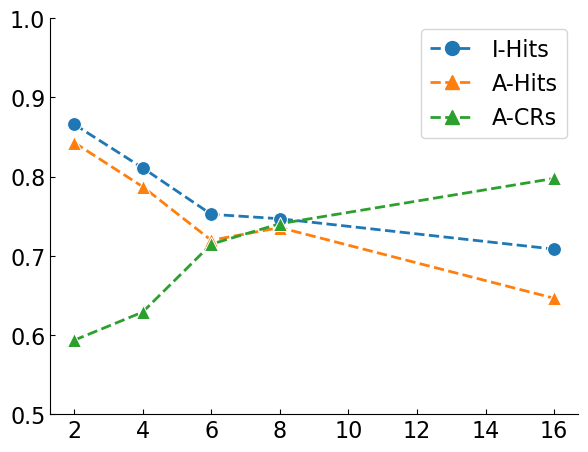

In [7]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

sns.lineplot(data=df, x='I_Hit_X', y='I_Hit_Y', linewidth=2, marker='o', markersize = 10, label='I-Hits', linestyle='--')
sns.lineplot(data=df, x='A_Hit_X', y='A_Hit_Y', linewidth=2, marker='^', markersize = 10, label='A-Hits', linestyle='--')
sns.lineplot(data=df, x='A_CR_X', y='A_CR_Y', linewidth=2, marker='^', markersize = 10, label='A-CRs', linestyle='--')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.ylim([0.5,1])
# plt.xlabel('Test Lag')
# plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='--', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='--', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_Hockley_hr.pdf')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

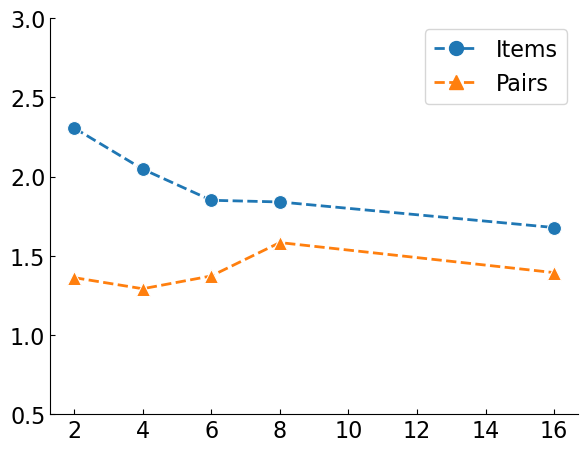

In [8]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df, x='Item_X', y='Item_Y', linewidth=2, marker='o', markersize = 10, label='Items', linestyle='--')
sns.lineplot(data=df, x='Pair_X', y='Pair_Y', linewidth=2, marker='^', markersize = 10, label='Pairs', linestyle='--')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.yticks(np.arange(0.5,3.5,0.5))
plt.xticks(ticks=np.arange(2,18,2))
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='--', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_Hockley_dprime.pdf')
plt.show()